In [23]:
##Libraries used:-
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [24]:
## Importing the Dataset using pandas
df = pd.read_csv("diabetes.csv")

In [25]:
## Observing the top 10 entries of the dataset using head()
df.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [26]:
## Checking for the missing/null values.
df.isna().sum()

## No feature holds any null values

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

In [27]:
## Using Integer based indexing to extract the features that we will use for the model
## x -> represents the independent variables
## y -> represents the dependent variable.
x = df.iloc[:, 0:8]
y = df.iloc[:,8]

In [28]:
### Confirming the features of 'x' selected are valid using display()
display(x)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [29]:
### Confirming the features of 'y' selected are valid using display()
display(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: label, Length: 768, dtype: int64

### This code uses train_test_split to split data (x, y) into training and testing sets (80-20 ratio) with a fixed random state.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)

In [31]:
y_train

294    0
597    0
749    1
647    1
755    1
      ..
642    1
241    0
253    0
390    0
667    1
Name: label, Length: 614, dtype: int64

### It standardizes features in X_train and X_test using StandardScaler, ensuring consistent scale for more effective machine learning modeling in this case the KNN modelling.







In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
## It is used for checking and displaying the shape (dimensions) of the X_train dataset.
X_train.shape

(614, 8)

In [34]:
X_test

array([[-1.12375096, -0.11702611,  0.57870657, ...,  1.64850044,
        -1.15060543, -0.78538173],
       [ 0.05118832,  1.59984014,  0.15962848, ...,  1.4504441 ,
         0.01706201, -0.61266526],
       [ 0.05118832,  0.48705646,  0.05485896, ..., -0.08449248,
         2.12185742, -0.95809819],
       ...,
       [-1.12375096,  2.45827327, -0.15468008, ...,  1.16573812,
         0.08592445, -0.43994879],
       [ 1.51986241, -0.5939334 ,  0.36916752, ...,  0.12594238,
         0.57394956,  1.11449943],
       [-1.12375096,  0.20091208,  0.57870657, ...,  0.54681208,
         0.99011821, -0.87173996]])

### This initializes a k-nearest neighbors classifier (KNeighborsClassifier) with 43 neighbors for classification tasks. 
#### -> K Nearest Neighbor is a supervised learning.
#### -> We perform this method of modelling when we categorical data, but perform both regression and classification based problems.


In [69]:
## We initisalise the neighbors to check, the neighbors are always set odd to 
knn = KNeighborsClassifier(n_neighbors=43)

In [46]:
## This trains thee k-nearest neighbors classifier (knn) on the training data (X_train, y_train) using the fit method.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=43)

In [47]:
## We check the accuracy of the knn model using the code.
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8246753246753247

### Iterating the knn values in the range of 0-100 and plot it to find the value of knn which provides the most accuracy 

In [44]:
# scores = []
# for i in range(1,100):
#     knn = KNeighborsClassifier(n_neighbors = i)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     scores.append(accuracy_score(y_test, y_pred))

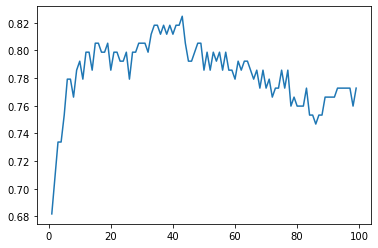

In [42]:
# # According to the plot the best value for the knn is 43.
# plt.plot(range(1,100), scores)

In [43]:
## As our dependent variable, "label" is already encoded in 0 or 1, so we dont need to encode it.
# label_encoder = preprocessing.LabelEncoder()
# y_trans = label_encoder.fit_transform(y_train)

### Principal Component Analysis (PCA) reduces features to 2 components in X_train. K-nearest neighbors (KNN) model is trained using transformed data (X_train2) and target labels (y_train).

In [48]:
pca =  PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
knn.fit(X_train2, y_train)

KNeighborsClassifier(n_neighbors=43)

In [51]:
## We are converting the y_train to an array as plot_decision_regions only take numpy arrays.
y_train = np.array(y_train)

#### A plot is created with a size of 13x10. Decision regions is getting plotted for the KNN classifier using transformed training data (X_train2) which we did above using "PCA",  Axes are labeled as Feature-1 and Feature-2, and the title of the plot is "Decision Boundary." 

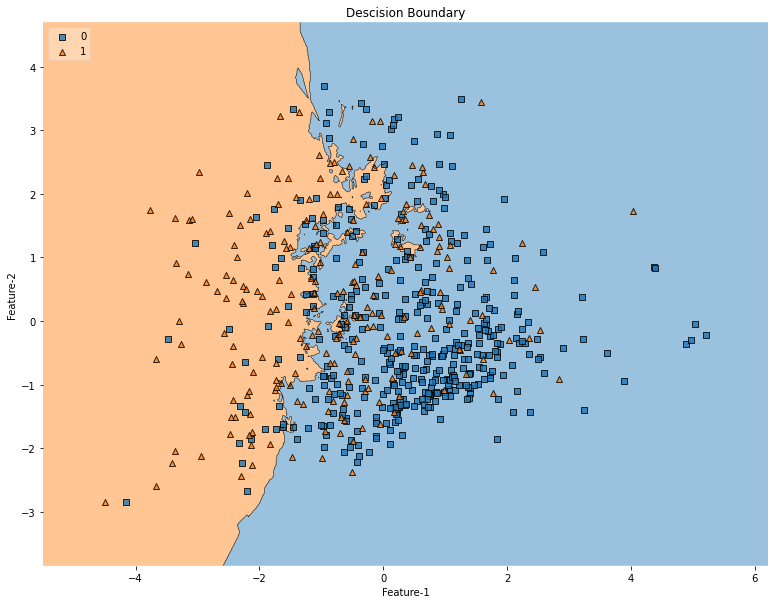

In [50]:

##  X and y have to be numpy arrays and the clf needs to have a predict() method.
plt.figure(figsize=(13, 10))
plot_decision_regions(X_train2, y_train, clf = knn, legend = 2) 
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.title("Descision Boundary")
plt.show()

## To check the accuracy of the models using different metrics:-

### 1) Manhattan Distance:
-> Manhattan distance is suitable for cases where the impact of variable magnitudes matters less or for vategorical and ordinal independent variables, there are many rows with zeros in it.  

-> The accuracy of 78.57% suggests that,it is less effective that the other 2 metrics which usually deals with numerical and categorical data

In [56]:
knn2 = KNeighborsClassifier(n_neighbors=43, metric = "manhattan")

In [57]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=43)

In [80]:
y_pred = knn2.predict(X_test)
print("The accuracy score of Hamming distance is: ",accuracy_score(y_test, y_pred))

The accuracy score of Hamming distance is:  0.7857142857142857


### 2) Euclidean Distance:
-> Euclidean distance is appropriate for continuous numerical data, measuring straight-line distance between points.

-> The accuracy of 82.47% suggests the model performed well using Euclidean distance, capturing numerical feature relationships effectively in the specified k-nearest neighbors modelling.

In [73]:
knn3 = KNeighborsClassifier(n_neighbors=43, metric = "euclidean")

In [74]:
knn3.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=43)

In [76]:
y_pred = knn3.predict(X_test)
print("The accuracy score of Hamming distance is: ",accuracy_score(y_test, y_pred))

The accuracy score of Hamming distance is:  0.8246753246753247


### 3) Hamming Distance:
-> Hamming distance is typically used when dealing with categorical or binary data, such as in text classification or DNA sequence analysis. 

-> When used gave an accuracy of 65.58% which is quite low as the dataset is not much suitable for the particular method.
                           

In [63]:
knn4 = KNeighborsClassifier(n_neighbors=43, metric = "hamming")

In [64]:
knn4.fit(X_train, y_train)

KNeighborsClassifier(metric='hamming', n_neighbors=43)

In [70]:
y_pred = knn4.predict(X_test)
print("The accuracy score of Hamming distance is: ",accuracy_score(y_test, y_pred))

The accuracy score of Hamming distance is:  0.6558441558441559


###### 4) Minkowski Distance: 
-> Minkowski distance is a generalization of both Euclidean and Manhattan distances, it is used for both categorical and numericakl to adjust the sensitivity of the outliers.

-> The accuracy of 82.46% indicates the model's is effective and performed well as our data is numerical and our target variable is categorcial.
                            

In [77]:
knn = KNeighborsClassifier(n_neighbors=43)

In [78]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=43)

In [79]:
y_pred = knn.predict(X_test)
print("The accuracy score of Hamming distance is: ",accuracy_score(y_test, y_pred))

The accuracy score of Hamming distance is:  0.8246753246753247
